# Marvel Studios Movies (2008-2011) Character & Sentiment Analysis 
### Created By: Jinning Yan
### Date: July 15th, 2023

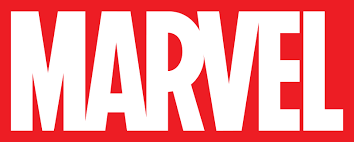

### Warnings Setting

In [35]:
import warnings
warnings.filterwarnings('ignore')

### Libraries

In [36]:
#Code 1: libraries
# Basi libraries to manipulate data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for text mining
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
from collections import Counter
from wordcloud import WordCloud
from ast import literal_eval
from textblob import TextBlob #sentiment
from PIL import Image
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Libraries for predictive models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yanji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yanji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Importing and massaging Marvel movies data

In [37]:
# import the file
marvel = pd.read_csv("mcu.csv")

In [38]:
print(marvel.columns.values)

['Unnamed: 0' 'character' 'line' 'movie' 'year' 'words' 'Adam McKay'
 'Anna Boden' 'Art Marcum' 'Ashley Edward Miller' 'Chris McKenna'
 'Christopher Ford' 'Christopher Markus' 'Christopher Yost' 'Craig Kyle'
 'Don Payne' 'Drew Pearce' 'Edgar Wright' 'Eric Pearson' 'Erik Sommers'
 'Geneva Robertson-Dworet' 'Hawk Ostby' 'James Gunn' 'Joe Cornish'
 'Joe Robert Cole' 'John Francis Daley' 'Jon Watts' 'Jonathan Goldstein'
 'Joss Whedon' 'Justin Theroux' 'Mark Fergus' 'Matt Holloway' 'Paul Rudd'
 'Ryan Coogler' 'Ryan Fleck' 'Shane Black' 'Stephen McFeely' 'Zack Stentz']


In [39]:
# Limiting years of movie dialogue between 2008 and 2011
marvel = marvel[(marvel['year'] >= 2008) & (marvel['year'] <= 2011)]

In [40]:
marvel.head()

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Joss Whedon,Justin Theroux,Mark Fergus,Matt Holloway,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008,6,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
3,3,RAMIREZ,I think they’re intimidated.,Iron Man,2008,4,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False


In [41]:
marvel.describe() #only getting numericals,we see we have almost 3194 scenes,

,Unnamed: 0,year,words
count,3194.000000,3194.000000,3194.000000
mean,1596.500000,2010.044771,11.937070
std,922.172706,1.154872,16.665181
min,0.000000,2008.000000,1.000000
25%,798.250000,2010.000000,4.000000
50%,1596.500000,2010.000000,7.000000
75%,2394.750000,2011.000000,14.000000
max,3193.000000,2011.000000,251.000000


### Popularity of Characters


In [42]:
# Popularity of characters. Among the 170 individual characters, Tony Stark (Iron Man) has the most entries at 591
# The reason of this could be because Iron Man is the movie that started the whole Marvel Universe, and by 2011, there was not many marvel movies.
marvel['character'].value_counts()

TONY STARK                           591
PEPPER POTTS                         278
STEVE ROGERS                         187
THOR                                 169
JAMES RHODES                         151
                                    ... 
PRETTY MUCH EVERYONE IN THE CROWD      1
KID IN THE BACKSEAT                    1
SOLDIERS                               1
ANTIQUE STORE OWNER                    1
JOTUN                                  1
Name: character, Length: 170, dtype: int64

### Top 20 Characters

In [43]:
# There are hundereds of character in the Marvel Universe
# We are limiting to only the top 20 characters that appeared in the universe between 2008 and 2011
top_character = marvel['character'].value_counts().nlargest(20)
top_character

TONY STARK               591
PEPPER POTTS             278
STEVE ROGERS             187
THOR                     169
JAMES RHODES             151
JANE FOSTER              120
LOKI                      91
JUSTIN HAMMER             82
PEGGY CARTER              76
ERIK SELVIG               69
VOLSTAGG                  62
COL. CHESTER PHILLIPS     60
PHIL COULSON              56
NATASHA ROMANOFF          56
JARVIS                    54
OBADIAH STANE             52
FANDRAL                   49
ODIN                      47
HAPPY HOGAN               44
SIF                       44
Name: character, dtype: int64

In [44]:
marvel_top_character = marvel[marvel['character'].isin(top_character.index)]
marvel_top_character

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Joss Whedon,Justin Theroux,Mark Fergus,Matt Holloway,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
6,6,TONY STARK,Please.,Iron Man,2008,1,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
8,8,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man,2008,28,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183,3183,STEVE ROGERS,Who are you?,Captain America: The First Avenger,2011,3,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3186,3186,STEVE ROGERS,Break what?,Captain America: The First Avenger,2011,2,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3188,3188,STEVE ROGERS,Yeah. Yeah. I just…I had a date.,Captain America: The First Avenger,2011,7,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3190,3190,STEVE ROGERS,"You’re here with a mission, sir?",Captain America: The First Avenger,2011,6,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Graphing Characters


<Axes: xlabel='count', ylabel='character'>

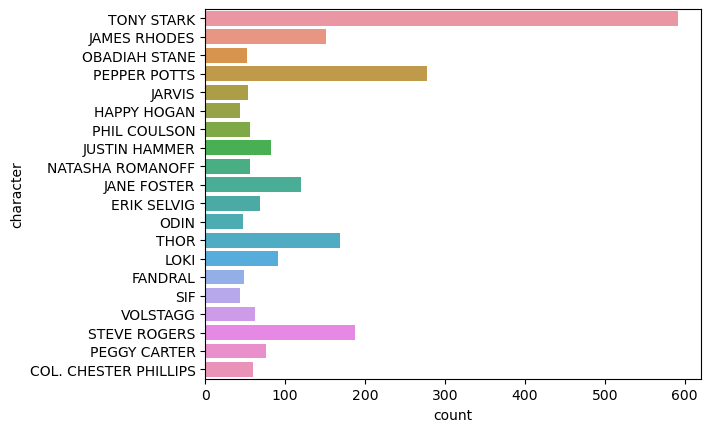

In [45]:
#Graph about characters and # lines in 'line'
#In the context of programming and data visualization, sns often refers to seaborn, a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

sns.countplot(y='character', data=marvel_top_character)

<Axes: xlabel='count', ylabel='character'>

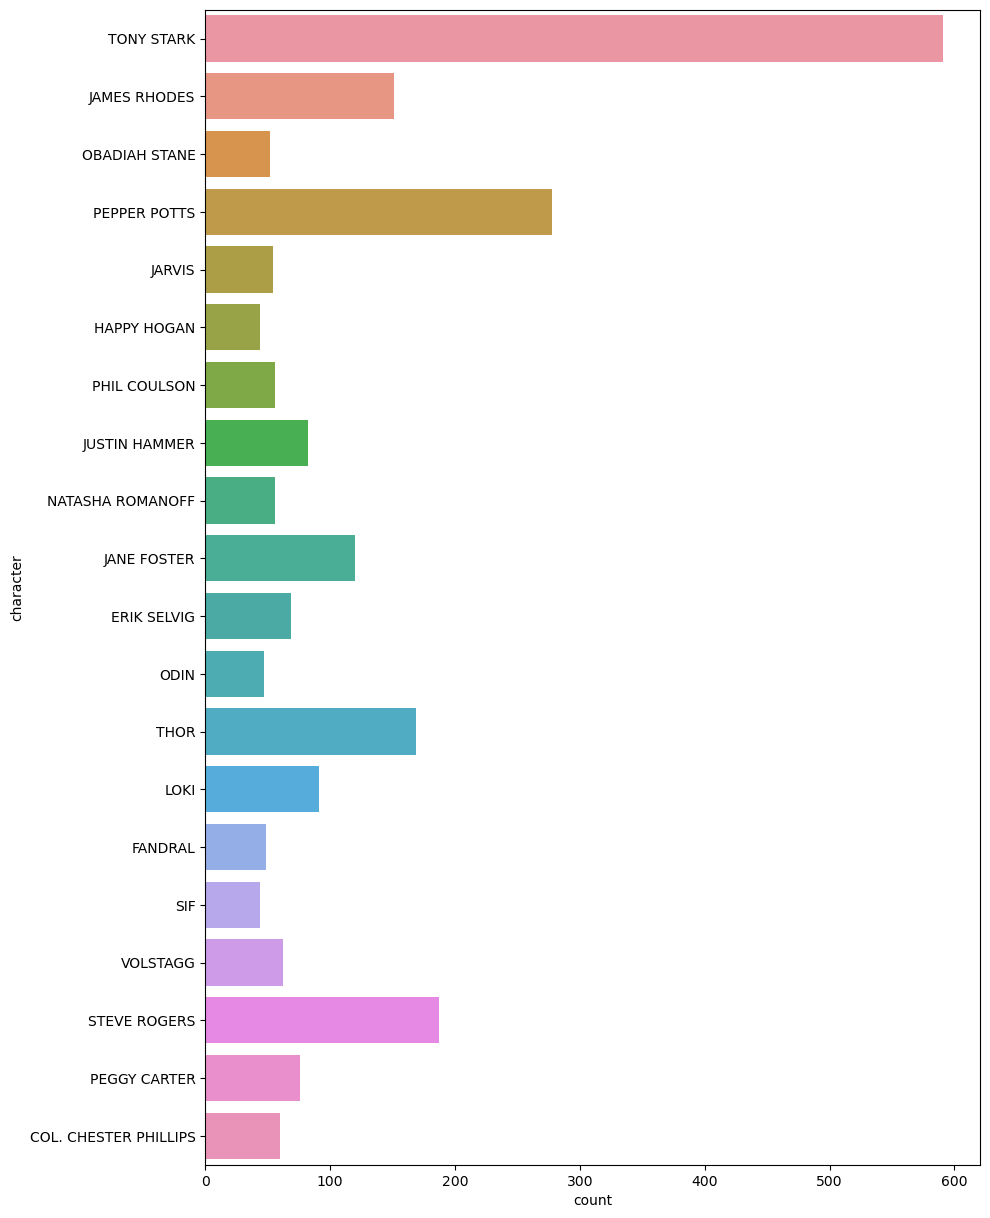

In [46]:
# Adjust the size of the graph, plt is from matplotlib
plt.figure(figsize=(10,15))
sns.countplot(y='character', data=marvel_top_character)

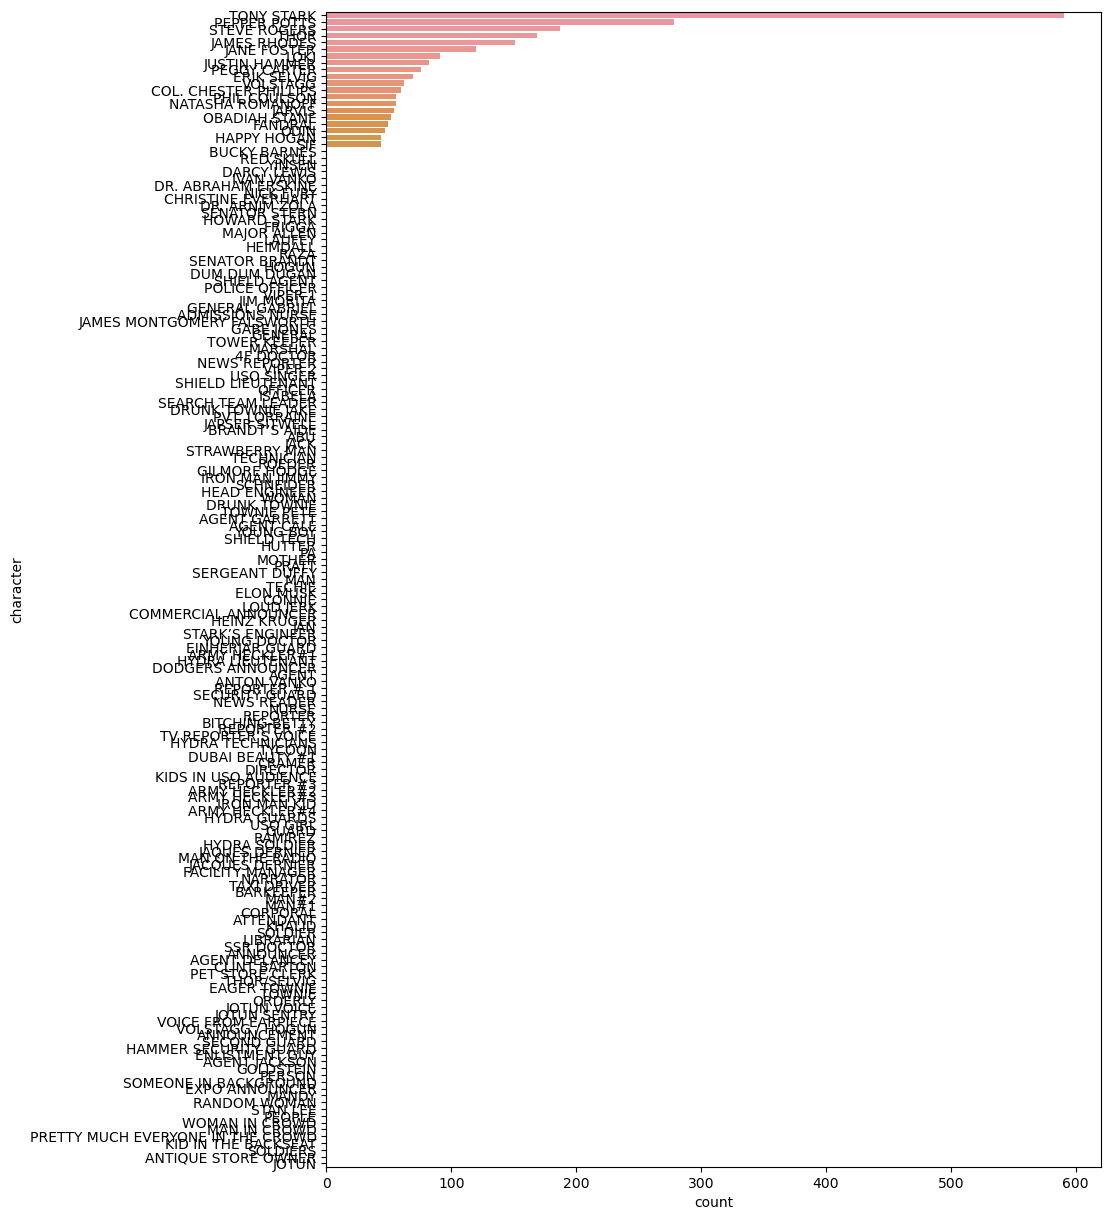

In [47]:
# Changing the order
plt.figure(figsize=(10,15))
sns.countplot(y='character', data=marvel_top_character,
             order=marvel.character.value_counts().index)
plt.show()

### Graphing in Order


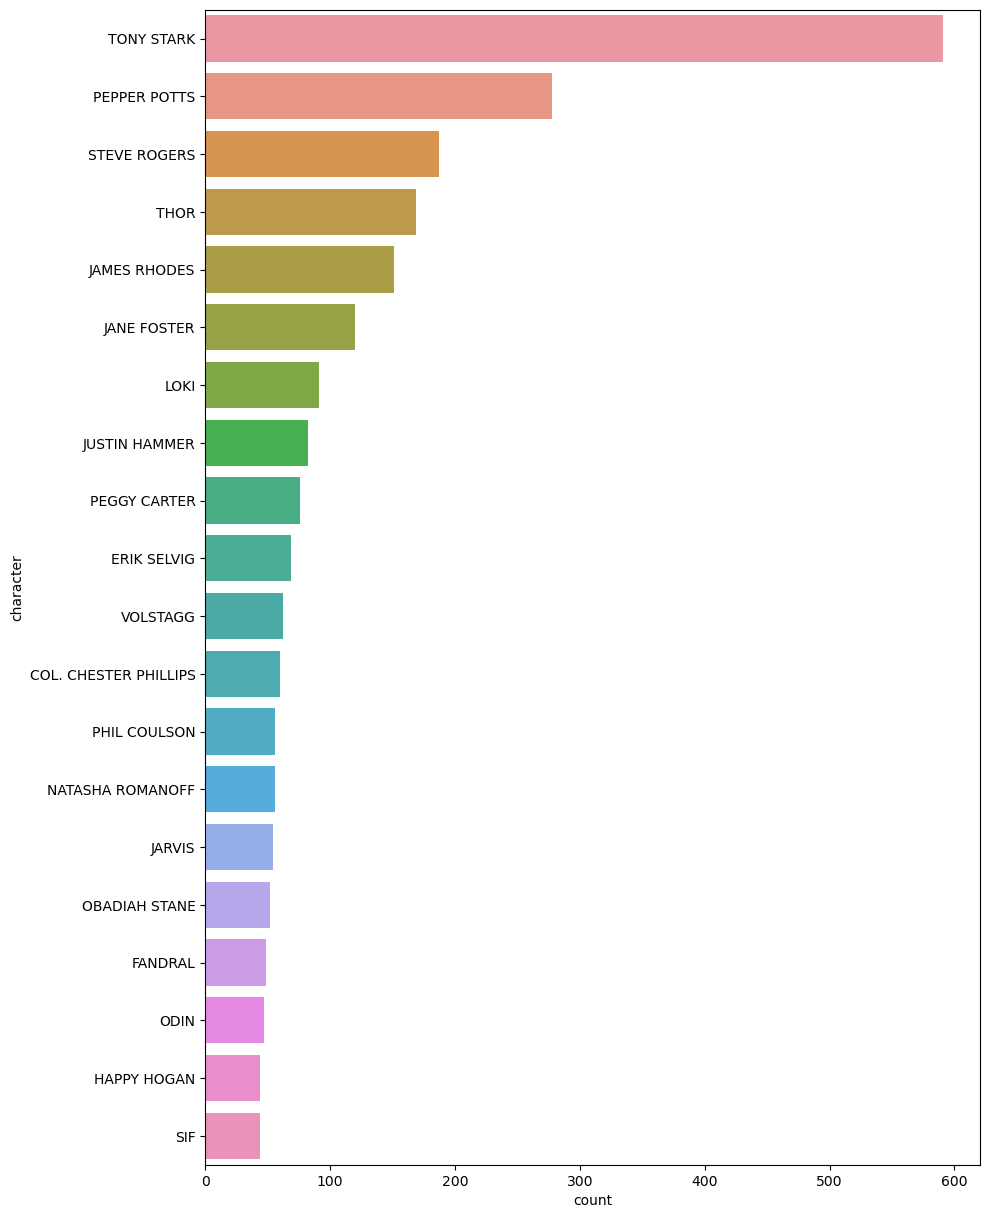

In [48]:
# Changing the order and reducing other characters
# This is the ranking diagram of the most popular/important character in the franchise between 2008 to 2011 as which character has the most lines.
plt.figure(figsize=(10,15))
sns.countplot(y='character', data=marvel_top_character, order=top_character.index)
plt.show()

### Counting Characters


In [49]:
marvel_top_character['numwords'] = marvel_top_character['line'].map(lambda x:len(re.findall(r'\w+', x)))

In [50]:
marvel.head()

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Joss Whedon,Justin Theroux,Mark Fergus,Matt Holloway,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man,2008,6,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
3,3,RAMIREZ,I think they’re intimidated.,Iron Man,2008,4,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False


In [51]:
wordsbychar = marvel_top_character.groupby('character', as_index=False).numwords.sum()
wordsbychar

,character,numwords
0,COL. CHESTER PHILLIPS,1017
1,ERIK SELVIG,804
2,FANDRAL,584
3,HAPPY HOGAN,242
4,JAMES RHODES,1793
5,JANE FOSTER,1349
6,JARVIS,651
7,JUSTIN HAMMER,2412
8,LOKI,1270
9,NATASHA ROMANOFF,408


### Graphing Words by Characters

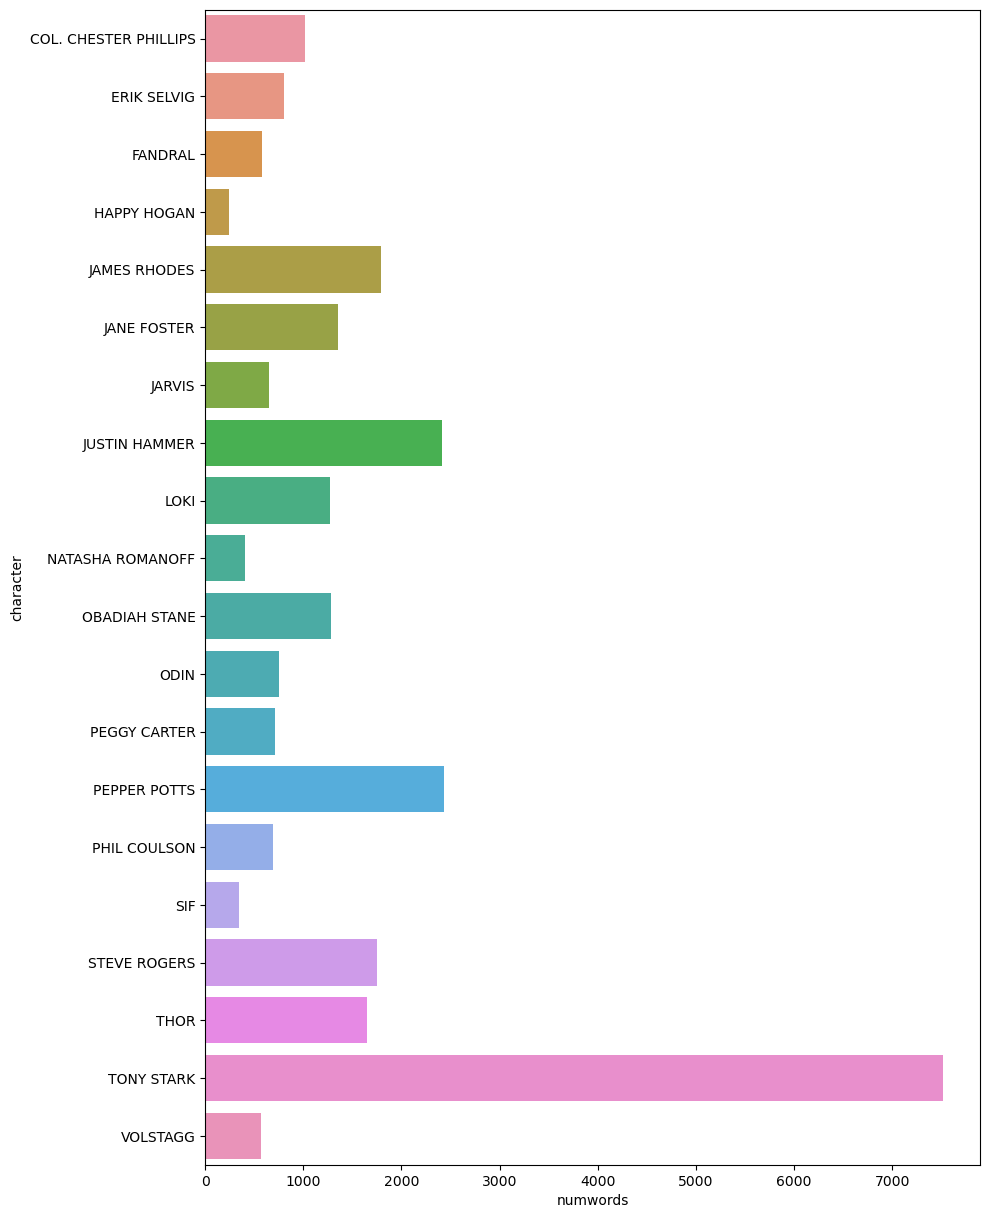

In [52]:
# Graph to check the number of words by character
plt.figure(figsize=(10,15))
sns.barplot(x='numwords', y='character', data=wordsbychar)
plt.show()

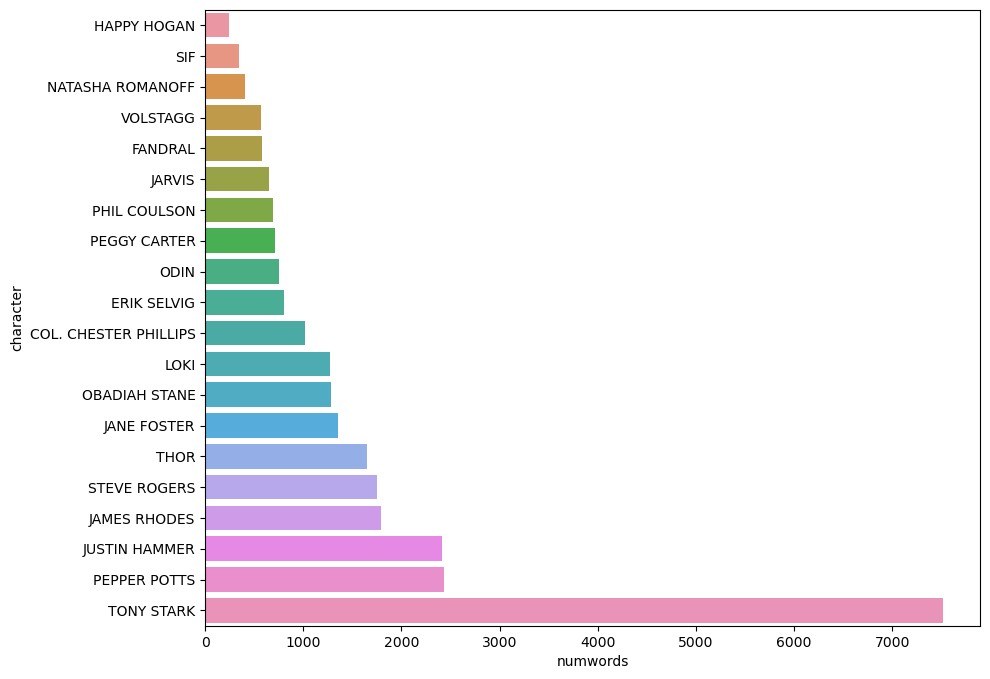

In [53]:
# re organize
# This diagram shows which character spoke the least to most words between 2008 to 2011.
plt.figure(figsize=(10,8))
sns.barplot(x='numwords', y='character', data=wordsbychar, order=wordsbychar.sort_values('numwords').character[0:20], orient='h')
plt.show()

### Functions


In [54]:
# Lowercase conversion, HTML tag removal, URL removal, digit removal, 
# tokenization, stopword removal, stemming, and lemmatization.
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [55]:
marvel_top_character.head(20) # first 20

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Justin Theroux,Mark Fergus,Matt Holloway,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz,numwords
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,True,True,False,False,False,False,False,False,20
2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,False,False,True,False,...,False,True,True,False,False,False,False,False,False,7
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,True,True,False,False,False,False,False,False,34
6,6,TONY STARK,Please.,Iron Man,2008,1,False,False,True,False,...,False,True,True,False,False,False,False,False,False,1
8,8,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man,2008,28,False,False,True,False,...,False,True,True,False,False,False,False,False,False,26
10,10,TONY STARK,Join the club.,Iron Man,2008,3,False,False,True,False,...,False,True,True,False,False,False,False,False,False,3
12,12,TONY STARK,Are you aware that Native Americans believe ph...,Iron Man,2008,24,False,False,True,False,...,False,True,True,False,False,False,False,False,False,24
14,14,JAMES RHODES,"GET DOWN, TONY. GET THE --",Iron Man,2008,7,False,False,True,False,...,False,True,True,False,False,False,False,False,False,5
16,16,JAMES RHODES,As Program Manager and Liaison to Stark Indust...,Iron Man,2008,68,False,False,True,False,...,False,True,True,False,False,False,False,False,False,67
17,17,OBADIAH STANE,"Thank you...I, uhhh, I’m not Tony Stark, but i...",Iron Man,2008,42,False,False,True,False,...,False,True,True,False,False,False,False,False,False,46


In [56]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yanji\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [57]:
# adding this processed function to our text in a new column
marvel_top_character['clean'] = marvel_top_character['line'].map(lambda x: preprocess(x))

### analysis

In [58]:
topwords = Counter("".join(marvel_top_character['clean']).split()).most_common(8)
topwords

[('get', 97),
 ('know', 83),
 ('like', 79),
 ('one', 69),
 ('got', 58),
 ('need', 54),
 ('right', 53),
 ('let', 53)]

In [59]:
text = " ". join(line for line in marvel_top_character["clean"])
text

'get guys allowed talk allowed talk see personal good god woman honestly called would apologize going saw soldier first please excellent question yes march schedule conflict thankfully christmas cover twins anyone else hand join club aware native americans believe photographs steal little piece soul worry mine long gone fire away get tony get program manager liaison stark industries honor serving real patriot man whose life dedicated protecting troops front lines friend great mentor man always friends country ladies gentlemen year ares award winner tony stark thank uhhh tony stark tony tell honored joy receive award best thing tony also worst thing always working think moment actually logical conclusion several mathematical truisms hypothalamus flooding system chain proteins called peptides every cell body opening happy chemical oxytocin hold second limbic system positively throbbing kirlian photograph right occupying space would show serious subatomic particles exchanged rapidity tran

In [60]:
marvel_top_character['character'].unique()

array(['TONY STARK', 'JAMES RHODES', 'OBADIAH STANE', 'PEPPER POTTS',
       'JARVIS', 'HAPPY HOGAN', 'PHIL COULSON', 'JUSTIN HAMMER',
       'NATASHA ROMANOFF', 'JANE FOSTER', 'ERIK SELVIG', 'ODIN', 'THOR',
       'LOKI', 'FANDRAL', 'SIF', 'VOLSTAGG', 'STEVE ROGERS',
       'PEGGY CARTER', 'COL. CHESTER PHILLIPS'], dtype=object)

In [61]:
tony = marvel_top_character[marvel_top_character['character']=='TONY STARK']

In [62]:
count_tony = Counter(" ".join(tony["clean"]).split()).most_common(5)
count_tony

[('get', 41), ('right', 35), ('need', 34), ('know', 33), ('want', 32)]

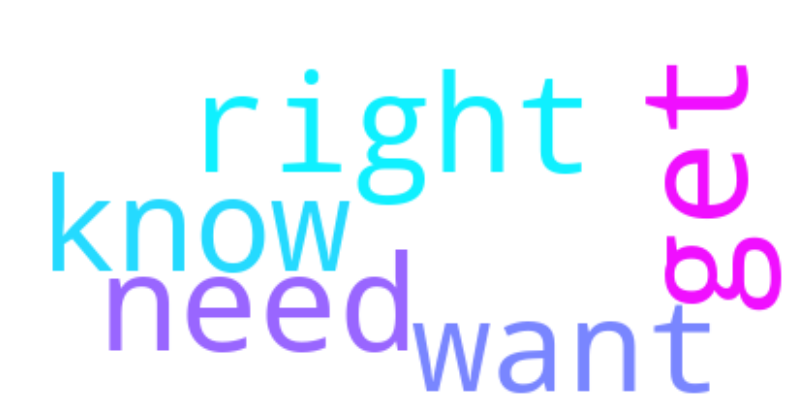

In [63]:
# Tony Stark wCloud
tony_wordcloud = WordCloud(background_color='white', max_words=100, colormap='cool').generate_from_frequencies(dict(count_tony))
plt.figure(figsize=(10, 10))
plt.imshow(tony_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
cap = marvel_top_character[marvel_top_character['character']=='STEVE ROGERS']

In [65]:
count_cap = Counter(" ".join(cap["clean"]).split()).most_common(5)
count_cap

[('know', 21), ('get', 13), ('one', 12), ('got', 11), ('think', 10)]

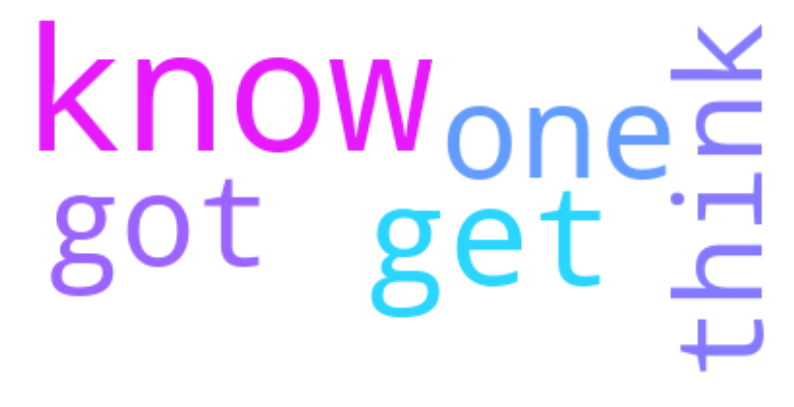

In [66]:
# Steve Rogers wCloud
cap_wordcloud = WordCloud(background_color='white', max_words=100, colormap='cool').generate_from_frequencies(dict(count_cap))
plt.figure(figsize=(10, 10))
plt.imshow(cap_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Analysis of Twitter Data (Sentiment Analysis)


### Importing and massaging Twitter feeds

In [71]:
# We import twits file to check for positivity rates
twits = pd.read_csv("twits.csv", encoding='latin-1', names = ['label','id','date','flag','user','text'])

In [72]:
twits.head()

,label,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [73]:
twits = twits.drop(['id','date','flag','user'], axis=1)

In [74]:
tsamp = twits.sample(n=80000, replace=False)

In [75]:
tsamp['clean'] = tsamp['text'].map(lambda x:preprocess(x))

In [76]:
tsamp['clean_count'] = tsamp['clean'].map(lambda x:len(re.findall(r'\w+', x))) # word count
common_twit = tsamp[tsamp['clean_count'] > 4]

In [77]:
common_twit.head()

,label,text,clean,clean_count
1092157,4,@omgwtfkvb put on Twilight for me. I love my b...,omgwtfkvb put twilight love best friend also f...,10
158855,0,Just dawned on me that my 17-chaps-in-8-days j...,dawned chaps days got cut day writeathon since...,12
233728,0,"Well, time for a shower, put on the shorts and...",well time shower put shorts start clearing back,8
349472,0,I can't believe they're going to remake Flight...,believe going remake flight navigator,5
1218659,4,@phil_on_air Ð° Ð·Ð°ÑÐµÐ¼ ÑÐ¾Ð³Ð´Ð° Ð½Ð°Ð¼ Ñ...,phil_on_air ðµð¼ ð¾ð³ð ð½ð ð½ñ ð½ð¾ ðµð³ð¾ ð²ð...,9


In [78]:
x_train = common_twit['clean']
y_train = common_twit['label']

In [79]:
x_train.head()

1092157    omgwtfkvb put twilight love best friend also f...
158855     dawned chaps days got cut day writeathon since...
233728       well time shower put shorts start clearing back
349472                 believe going remake flight navigator
1218659    phil_on_air ðµð¼ ð¾ð³ð ð½ð ð½ñ ð½ð¾ ðµð³ð¾ ð²ð...
Name: clean, dtype: object

In [80]:
y_train.head()

1092157    4
158855     0
233728     0
349472     0
1218659    4
Name: label, dtype: int64

In [81]:
y_train.unique()

array([4, 0], dtype=int64)

In [82]:
y_train = y_train.replace(4,1) #It replaces every 4 by 1, making it binary

In [83]:
y_train.unique() # 0 means negative and 1 is positive

array([1, 0], dtype=int64)

### Predictive Models

In [84]:
# Create 90% training test, 10% validation test
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

In [85]:
tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(x_train.values) + list(x_valid.values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_valid)


In [86]:
# logstic regression 
marvel_vectorized = vectorizer.transform(marvel_top_character['clean'])
logreg = LogisticRegression(max_iter=1000, multi_class='multinomial')
logreg.fit(train_vectorized, y_train)
logreg.score(test_vectorized, y_valid)

0.7472178060413355

In [87]:
# Linear SVC (support vector classification)
linsvc = LinearSVC(max_iter=20000)
linsvc.fit(train_vectorized, y_train)
linsvc.score(test_vectorized, y_valid)

0.7475711005122769

In [88]:
#Multinomial Naive Bayes Classifier
multinb = MultinomialNB()
multinb.fit(train_vectorized, y_train)
multinb.score(test_vectorized, y_valid)

0.7279632573750221

In [89]:
# Bernoulli Naive Bayes Classifier
bernb = BernoulliNB()
bernb.fit(train_vectorized, y_train)
bernb.score(test_vectorized, y_valid)

0.7311429076134959

#### Logistic regression (and linear SVC) have the highest accuracy rate. To make the model more accurate, we can use a bigger sample or a more complicated method like neuro-network

In [90]:
# Creating the prediction off the sentiment on the clean message
preds = logreg.predict(marvel_vectorized)
marvel_top_character['sentiment_pred'] = preds
marvel_top_character.head()

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Matt Holloway,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz,numwords,clean,sentiment_pred
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,True,False,False,False,False,False,False,20,get guys allowed talk allowed talk,0
2,2,TONY STARK,Oh. I see. So it’s personal.,Iron Man,2008,8,False,False,True,False,...,True,False,False,False,False,False,False,7,see personal,1
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,True,False,False,False,False,False,False,34,good god woman honestly called would apologize...,1
6,6,TONY STARK,Please.,Iron Man,2008,1,False,False,True,False,...,True,False,False,False,False,False,False,1,please,0
8,8,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man,2008,28,False,False,True,False,...,True,False,False,False,False,False,False,26,excellent question yes march schedule conflict...,1


In [91]:
# make the count of words of messages be filtered to more than 2 words
marvel_top_character['clean_count'] = marvel_top_character['clean'].map(lambda x: len(re.findall(r'\w+', x)))
marvel_filter = marvel_top_character[marvel_top_character['clean_count'] > 2]
marvel_filter.head()

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz,numwords,clean,sentiment_pred,clean_count
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,False,False,False,False,False,20,get guys allowed talk allowed talk,0,6
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,False,False,False,False,False,34,good god woman honestly called would apologize...,1,11
8,8,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man,2008,28,False,False,True,False,...,False,False,False,False,False,False,26,excellent question yes march schedule conflict...,1,13
12,12,TONY STARK,Are you aware that Native Americans believe ph...,Iron Man,2008,24,False,False,True,False,...,False,False,False,False,False,False,24,aware native americans believe photographs ste...,0,15
14,14,JAMES RHODES,"GET DOWN, TONY. GET THE --",Iron Man,2008,7,False,False,True,False,...,False,False,False,False,False,False,5,get tony get,0,3


In [92]:
# Checking only those main 15 characters
main = marvel_filter['character'].value_counts().head(15).reset_index()
main.columns = ['character','count']
main

,character,count
0,TONY STARK,364
1,PEPPER POTTS,128
2,JAMES RHODES,96
3,STEVE ROGERS,93
4,THOR,92
5,JANE FOSTER,72
6,LOKI,60
7,JUSTIN HAMMER,53
8,COL. CHESTER PHILLIPS,46
9,JARVIS,45


In [93]:
marvel_filter = marvel_filter[marvel_filter.character.isin(main['character'])]

In [94]:
marvel_filter.head()

,Unnamed: 0,character,line,movie,year,words,Adam McKay,Anna Boden,Art Marcum,Ashley Edward Miller,...,Paul Rudd,Ryan Coogler,Ryan Fleck,Shane Black,Stephen McFeely,Zack Stentz,numwords,clean,sentiment_pred,clean_count
0,0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man,2008,22,False,False,True,False,...,False,False,False,False,False,False,20,get guys allowed talk allowed talk,0,6
4,4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man,2008,31,False,False,True,False,...,False,False,False,False,False,False,34,good god woman honestly called would apologize...,1,11
8,8,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man,2008,28,False,False,True,False,...,False,False,False,False,False,False,26,excellent question yes march schedule conflict...,1,13
12,12,TONY STARK,Are you aware that Native Americans believe ph...,Iron Man,2008,24,False,False,True,False,...,False,False,False,False,False,False,24,aware native americans believe photographs ste...,0,15
14,14,JAMES RHODES,"GET DOWN, TONY. GET THE --",Iron Man,2008,7,False,False,True,False,...,False,False,False,False,False,False,5,get tony get,0,3


In [95]:
# Check the average positivity of messages for each of the top 15 characters
sentimentbychar = marvel_filter.groupby('character', as_index=False).sentiment_pred.mean()
sentimentbychar

,character,sentiment_pred
0,COL. CHESTER PHILLIPS,0.565217
1,ERIK SELVIG,0.511111
2,JAMES RHODES,0.468750
3,JANE FOSTER,0.472222
4,JARVIS,0.600000
5,JUSTIN HAMMER,0.547170
6,LOKI,0.516667
7,OBADIAH STANE,0.384615
8,PEGGY CARTER,0.522727
9,PEPPER POTTS,0.609375


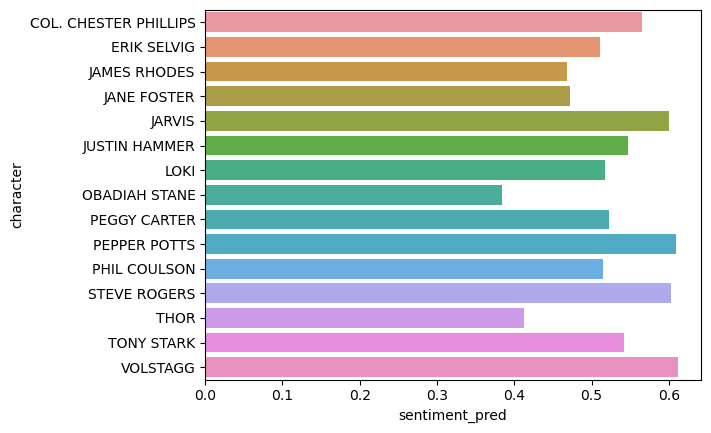

In [96]:
# Plot the average positivity of messages of the top 15 characters
sns.barplot(x='sentiment_pred', y='character', data=sentimentbychar)
plt.show()

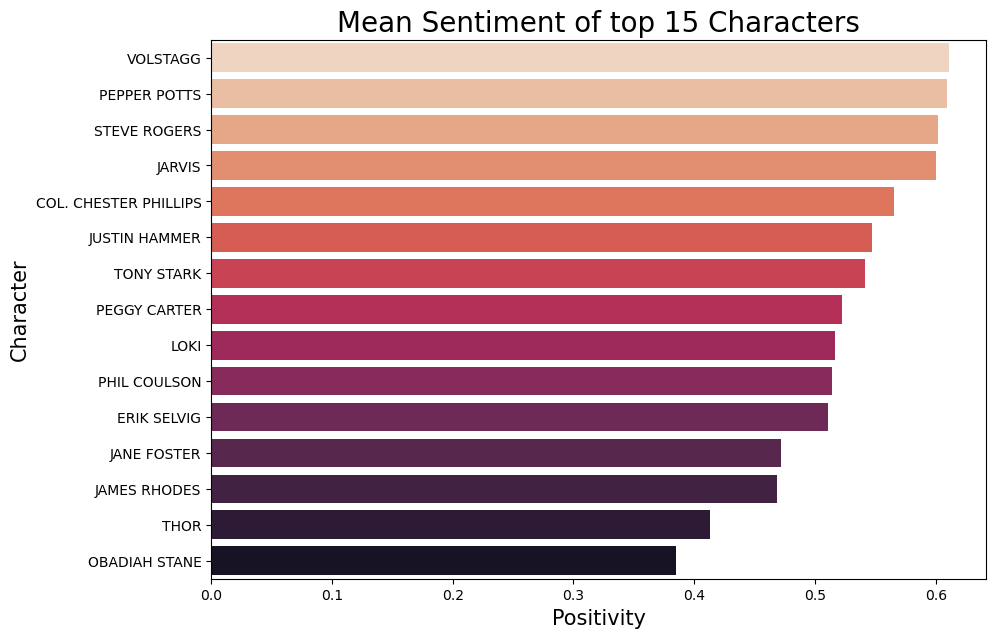

In [97]:
# Make it look nicer
# As we can see, Steve Rogers (Captain America) is the most beloved between 2008 to 2011 in the Marvel Universe.
# Where Obadiah Stane, the vilian character of Iron Man 2 aired in 2020 was the least loved character between the time.
plt.figure(figsize=(10,7))
sns.barplot(x='sentiment_pred', y='character', data=sentimentbychar, palette='rocket_r', order=sentimentbychar.sort_values('sentiment_pred', ascending=False).character[0:15], orient='h')
plt.xlabel('Positivity', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.title('Mean Sentiment of top 15 Characters', fontsize=20)
plt.show()

In [98]:
# Check the average positivity of messages along the movie
# The reason we are missing the year of 2009 is that there were no Marvel movies that year.
year = pd.DataFrame(marvel_top_character.groupby('year', as_index=False).sentiment_pred.mean())
year

,year,sentiment_pred
0,2008,0.569573
1,2010,0.632040
2,2011,0.582000


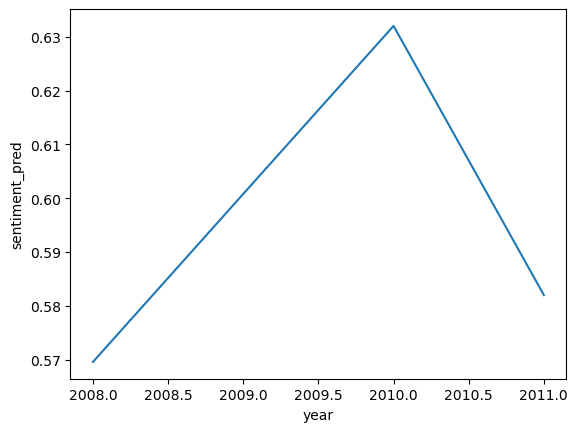

In [99]:
# Plot the regression of sentiments along the various Marvel movies along the period
year = pd.DataFrame(marvel_top_character.groupby('year', as_index=False).sentiment_pred.mean())
sns.lineplot(x="year", y="sentiment_pred", data=year)
plt.show()

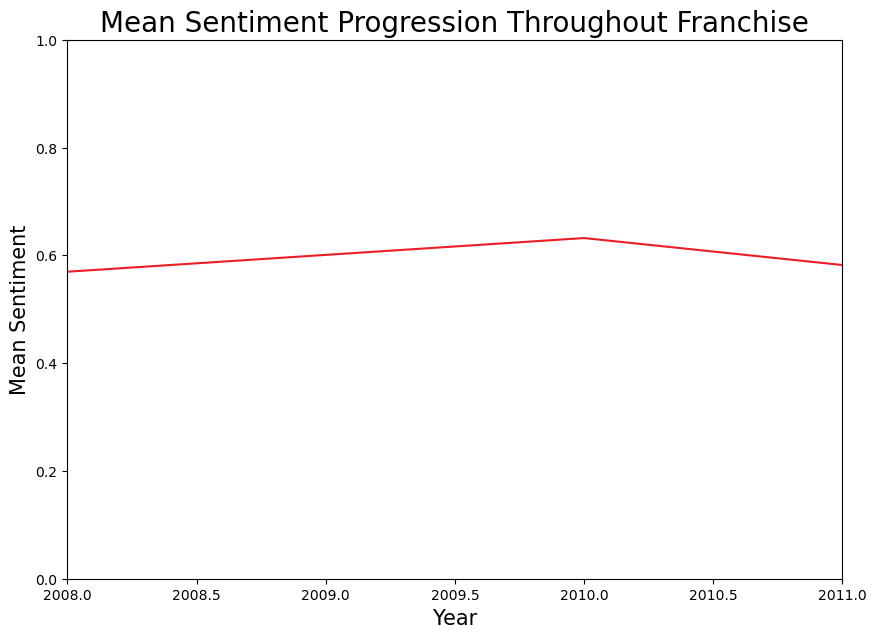

In [101]:
# Making it nicer
# In 2010, Marvel Studios launched Iron Man 2, which seems to be the most love movies between 2008 to 2010.
# On the other hand, we can see that the audience liked the movies Marvel Studios made during the period as all values sits above 0.55.
year = pd.DataFrame(marvel_top_character.groupby('year', as_index=False).sentiment_pred.mean())
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='sentiment_pred', data=year, color='#ed1d24')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Mean Sentiment', fontsize=15)
plt.title('Mean Sentiment Progression Throughout Franchise', fontsize=20)
plt.ylim(0,1)
plt.xlim(2008,2011)
plt.show()